# Algoritmo de Dijkstra 
Alberto Josué Ortiz Rosales

21 - 03 -2022



Este algoritmo pertenece a los algoritmos glotones "Greedy" con el cual se puede encontrar el camino más corto de manera eficiente.

Dada una gráfica:

$G = (V, E)$, con una función de peso $ E → \mathbb{R}$. El **peso** $w(p)$ de un camino $p=\langle v_0, v_1, ..., v_k \rangle$ es la suma de todos los peso de los ejes que lo contituyen. 

$w(p) = \sum_{i=1}^{k} w(v_{i-1}, v_{i}) $

Entonces el camino más corto de $u$ a $v$ se define como:

$$
δ(u,v)=
\begin{cases}
min( w(p):u\rightsquigarrow v ) \; si \; existe \\
\; de \; lo \; contrario \; ∞
\end{cases}
$$

Este algoritmo usa la técnica de relajación que consiste en encontrar en cada iteración si se puede mejorar el camino más corto. El término relajación consiste en disminuir el valor del camino más corto. 
```python 
Inicialización ( G , s) :
for v in G:
  v.d  = infty
  v.pi = Nil
s.d = 0
```
Dónde el atributo d es el límite superior de el peso del camino de $s$ a $d$ y el atributo pi $\pi$ que indica el predecesor.

```python 
Relajación ( u, v, w) :
if v.d > u.d + w(u,v)
  v.d  = u.d + w(u,v)
  v.pi = u 
```


```python 
Dijkstra ( G, w, s) :
Inicialización(G, s)
S = 0    #Conjunto de vertices
Q = G.V  #Fila de prioridad
while Q != 0:
  u = Extract-Min(Q)
  S = S \cup {u}
  for v in G.adj[u]:
    Relajación(u,v,w)
```


In [ ]:
import sys

class Graph():
 
    def __init__(self, v):
        self.V = v
        self.graph = [[0 for column in range(v)]
                      for row in range(v)]
        self.d = [sys.maxsize] * v
 
    def printGraph(self):
        print("V \t Distancia")
        for v in range(self.V):
            print(v, "\t\t", self.d[v])
 
    def minD(self, S):
        min = sys.maxsize

        for v in range(self.V):
            if self.d[v] < min and S[v] == False:
                min = self.d[v]
                min_index = v
 
        return min_index
 
    def dijkstra(self, s):
 
        self.d[s] = 0
        S = [False] * self.V
 
        for cout in range(self.V):
 
            u = self.minD(S)
            S[u] = True
 
            for v in range(self.V):
                # Relajación
                if (self.graph[u][v] > 0 and not(S[v]) and self.d[v] > self.d[u] + self.graph[u][v]):
                    self.d[v] = self.d[u] + self.graph[u][v]
 
# Demostración

g = Graph(5)
g.graph = [[0,10,5,0,0],
           [0,0,2,1,0],
           [0,3,0,9,2],
           [0,0,0,0,4],
           [7,0,0,0,6]]
 
g.dijkstra(0)
g.printGraph()
 

V 	 Distancia
0 		 0
1 		 8
2 		 5
3 		 9
4 		 7


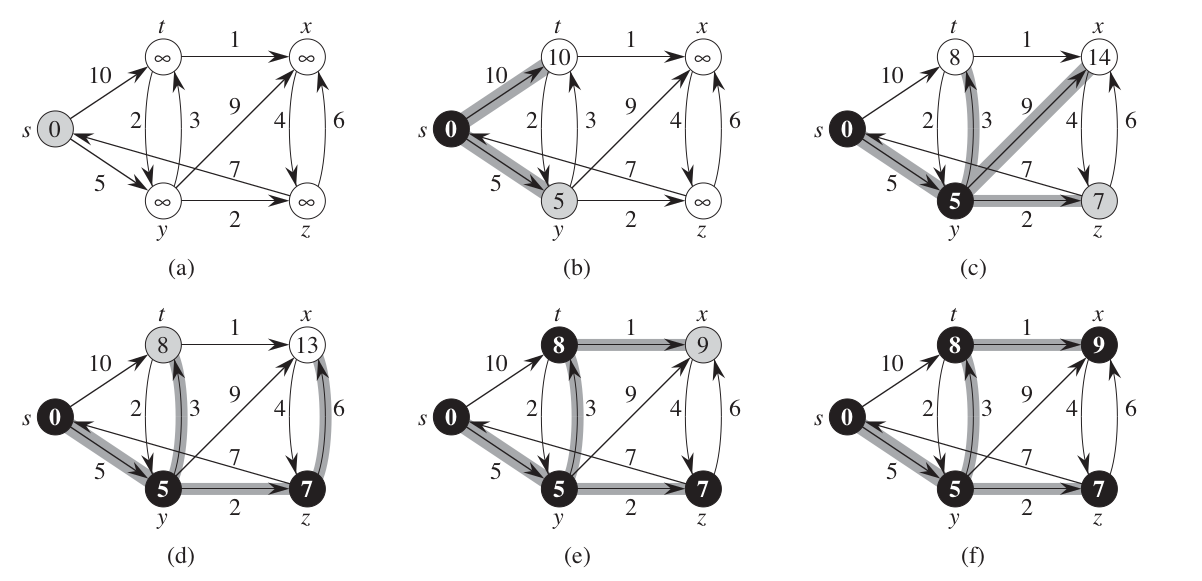

## Significado de elevar a pontencias una matriz

In [19]:
import numpy as np
def multiplicacion (M, n):
    res = [[0 for x in range(0, len(M[0]))]for y in range(0, len(M[0]))]
    for a in range(0, n-1): 
        for i in range(0, len(M[0])):
            for j in range(0, len(M[0])):
                  for k in range(0, len(M[0])):
                      res[i][j] += M[i][k] * M[k][j] 

    return res

M = [[0,1,1,0,1,0],
     [1,0,0,1,0,1],
     [1,0,0,0,1,0],
     [0,1,0,0,0,1],
     [1,0,1,0,0,1],
     [0,1,0,1,1,0]]

print(np.matrix(multiplicacion(M, 3)))


[[6 0 2 2 2 4]
 [0 6 2 2 4 2]
 [2 2 4 0 2 2]
 [2 2 0 4 2 2]
 [2 4 2 2 6 0]
 [4 2 2 2 0 6]]


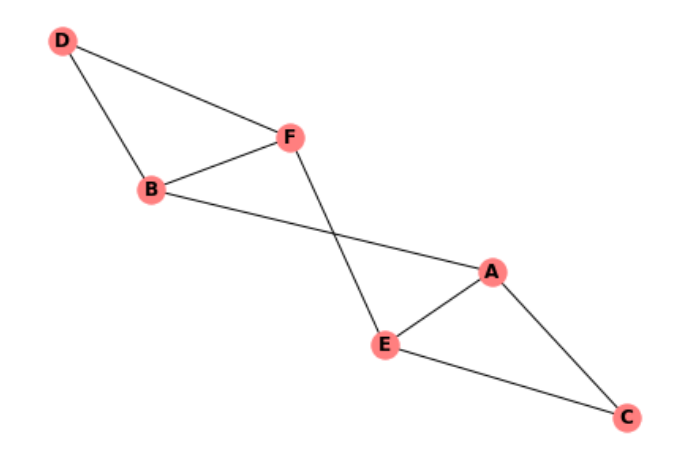

En general el elemento $M(i,j)$ indica el número de caminos existentes de i a j de tamaño n. La diagonal indica cuantos nodos son adyacentes al nodo que está representado en la fila (n=2). O el número de cilos de tamaño n.


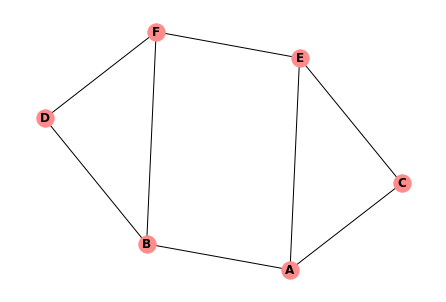

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
# Gráfica vista en clase
G.add_edges_from([('A','B'),('B','F'),('B','D'),('D','F'),('E','F'),('E','A'), ('A','C'),('E','C')])
pos = nx.spring_layout(G, iterations = 100)
nx.draw(G, pos,with_labels=True, font_weight='bold', node_color ='#FF8B8B')




In [28]:
# A 
print("Grado del nodo A",G.degree('A'))

print("Shortest path", nx.single_source_shortest_path(G, 'A'))

print("Diametro", nx.algorithms.approximation.distance_measures.diameter(G, seed=100))
print("Average clustering", nx.algorithms.approximation.average_clustering(G))

Grado del nodo A 3
Shortest path {'A': ['A'], 'B': ['A', 'B'], 'E': ['A', 'E'], 'C': ['A', 'C'], 'F': ['A', 'B', 'F'], 'D': ['A', 'B', 'D']}
Diametro 3
Shortest path 0.532


In [33]:
# B
print("Katz centrality", nx.algorithms.centrality.katz_centrality(G))
print("Eigenvector", nx.algorithms.centrality.eigenvector_centrality(G))
print("Ranks", nx.algorithms.link_analysis.pagerank_alg.pagerank(G))



Katz centrality {'A': 0.42059550774276483, 'B': 0.42059550774276483, 'F': 0.42059550774276483, 'D': 0.382359566028119, 'E': 0.42059550774276483, 'C': 0.382359566028119}
Eigenvector {'A': 0.4440369126218569, 'B': 0.4440369126218569, 'F': 0.4440369126218569, 'D': 0.3250575956019159, 'E': 0.4440369126218569, 'C': 0.3250575956019159}
Ranks {'A': 0.18506487372353833, 'B': 0.18506487372353833, 'F': 0.18506487372353833, 'D': 0.12987025255292317, 'E': 0.18506487372353833, 'C': 0.12987025255292317}


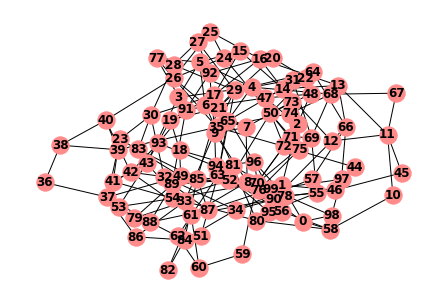

In [34]:
# C Watts Strogatz
g = nx.generators.random_graphs.connected_watts_strogatz_graph(n=100,k=5,p=0.5)
pos = nx.spring_layout(g, iterations = 100)
nx.draw(g, pos,with_labels=True, font_weight='bold', node_color ='#FF8B8B')


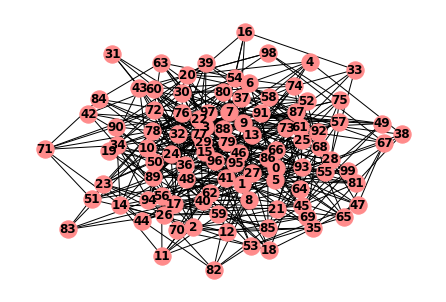

In [38]:
# C Erdös Renyi
g = nx.generators.random_graphs.erdos_renyi_graph(n=100, p=0.10)
pos = nx.spring_layout(g, iterations = 100)
nx.draw(g, pos,with_labels=True, font_weight='bold', node_color ='#FF8B8B')

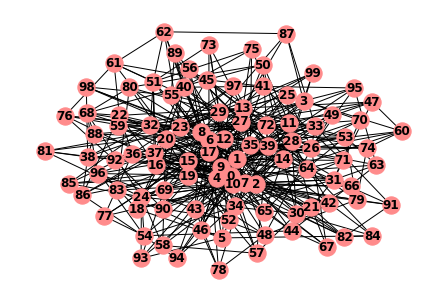

In [40]:
# C Barabasi Albert
g = nx.generators.random_graphs.barabasi_albert_graph(n=100, m=5)
pos = nx.spring_layout(g, iterations = 100)
nx.draw(g, pos,with_labels=True, font_weight='bold', node_color ='#FF8B8B')